# Iris Dataset Project (SVM Algorithm)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

# Exploratory Data Analysis (EDA)

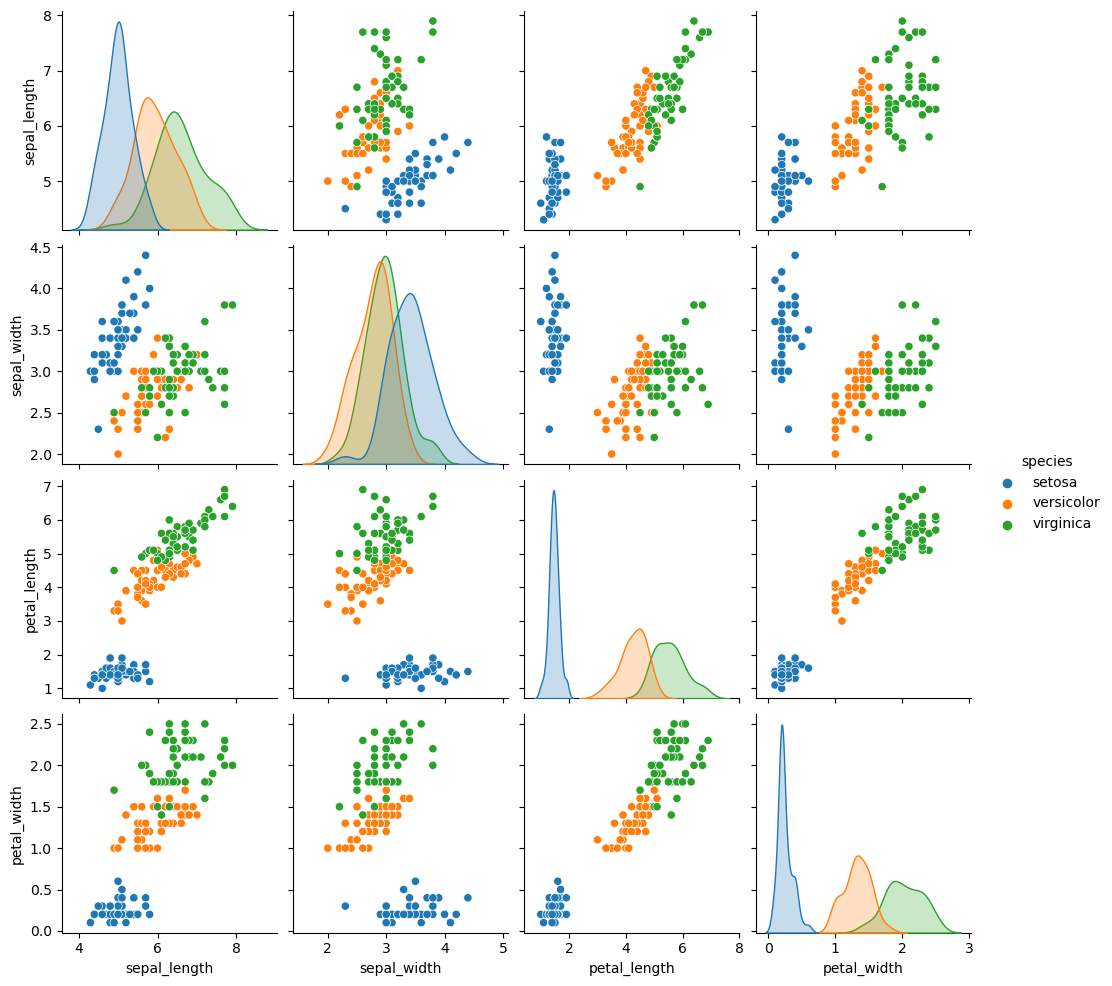

In [8]:
sns.pairplot(data=iris,hue='species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

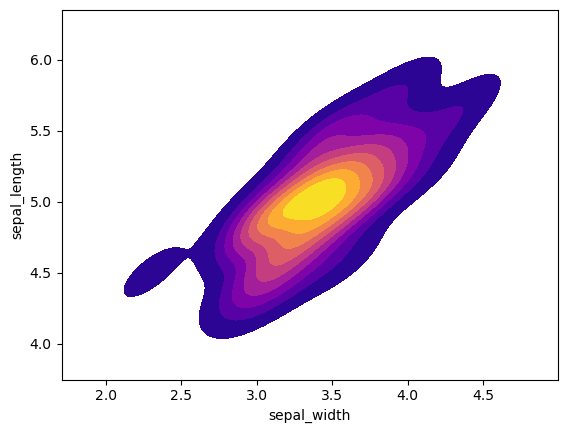

In [9]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

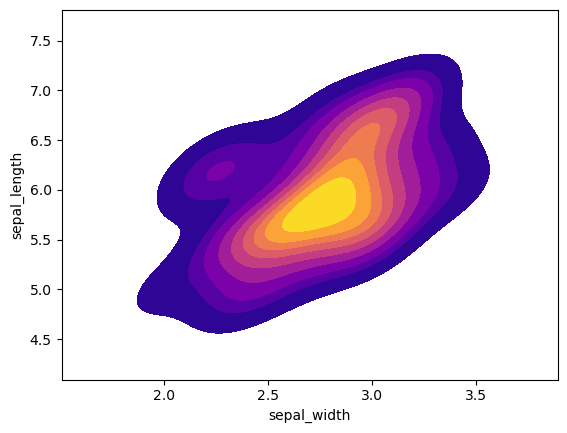

In [10]:
versicolor = iris[iris['species']=='versicolor']
sns.kdeplot(versicolor['sepal_width'],versicolor['sepal_length'],cmap='plasma',shade=True)

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

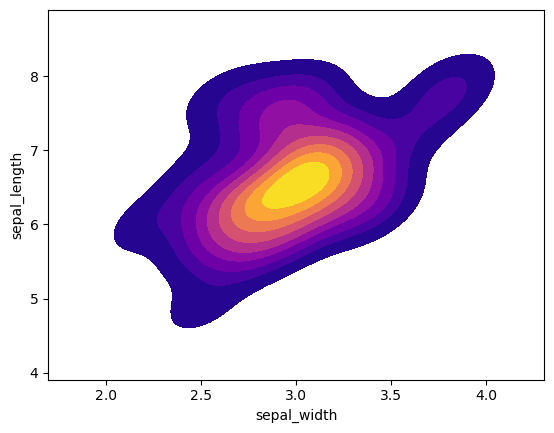

In [11]:
virginica = iris[iris['species']=='virginica']
sns.kdeplot(virginica['sepal_width'],virginica['sepal_length'],cmap='plasma',shade=True)

# Train Test Split

In [12]:
X = iris.drop('species',axis=1)
y = iris['species']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

# Modelling and Evaluation

In [16]:
from sklearn.svm import SVC

In [17]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [18]:
svc_pred = svc.predict(X_test)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
print(confusion_matrix(y_test,svc_pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]


In [21]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Accuray is great bcz amount of data is less and SVC is used to modelling large amount of data. But, we are going to use GridSearchCV to check how it will work. However, our above result is pretty much good but, for learning purpose we are going to use GridSearchCV.

# GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.5,0.1,0.01]}

In [28]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)

In [29]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.905 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.5;, score=1.000 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.5;, score=1.000 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.5;, score=0.857 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.5;, score=0.952 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.5;, score=0.952 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.857 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.5, 0.1, 0.01]},
             verbose=3)

In [30]:
grid.best_params_

{'C': 1, 'gamma': 0.5}

In [31]:
grid_pred = grid.predict(X_test)

In [32]:
print(confusion_matrix(y_test,grid_pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


In [33]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Conclusion 

So, our model result is now more accurate than previous one, it will classify all the flowers accuratlly and their is no data which show error as per confusion matrix. Classification Report shows 100% accurate. 

However, it is not a good practice for Support Vector Machine (SVM Algorithm), try to apply this algorithm for large dataset by which you are more clear about how it will actually work.

This project is just for learning purpose that how the SVM Algo. work in Machine Learning Modelling.

Be Happy, Keep Learning :)